In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/Position_Salaries.csv")
dataset.drop(columns = ["Position"] , inplace = True )
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


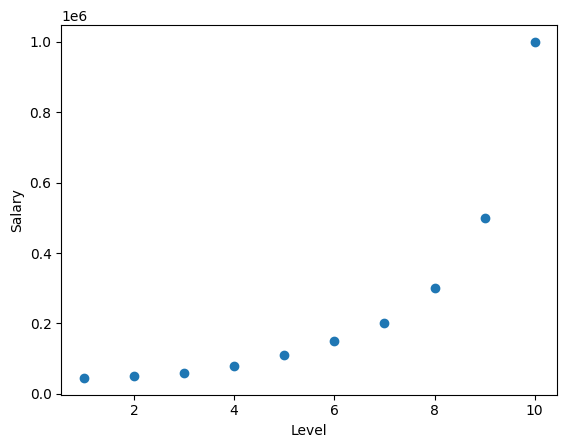

In [38]:
plt.scatter(dataset["Level"] , dataset["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [39]:
x = dataset[["Level"]]
y = dataset["Salary"]

In [40]:
from sklearn.preprocessing import PolynomialFeatures


In [41]:
pf = PolynomialFeatures(degree = 3)
x = pf.fit_transform(x)
x

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [42]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)


LinearRegression()

In [44]:
# y = m1x1+m2x2^2+m3x3^3+m4x4^4+m5x5^5+c
lr.coef_ , lr.intercept_

(array([     0.        , 157144.24209541, -44274.84207263,   3925.87219715]),
 -83661.2021857989)

In [45]:
lr.score(x_test , y_test)*100

87.62695647830066

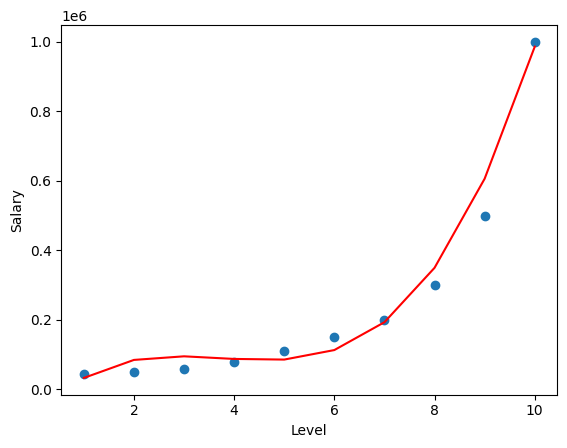

In [46]:
plt.scatter(dataset["Level"] , dataset["Salary"])
plt.plot(dataset["Level"] , lr.predict(x) , color = "red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# deploy

In [47]:
test =  pf.transform([[6]])
test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,   6.,  36., 216.]])

In [48]:
lr.predict(test)

array([113298.33035623])

In [49]:
dataset

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000
